In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
!python -m spacy download en_core_web_sm --quiet
!pip install rasa --ignore-installed ruamel.yaml --quiet
!pip install chatterbot_corpus --quiet
!pip install pyLDAvis --quiet
!pip install --ignore-installed ruamel-yaml
!pip install chart_studio --quiet
!python -m pip install -U gensim

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
distributed 2021.1.0 requires cloudpickle>=1.5.0, but you have cloudpickle 1.4.1 which is incompatible.
chatterbot-corpus 1.2.0 requires PyYAML<4.0,>=3.12, but you have pyyaml 5.4.1 which is incompatible.
  Using cached ruamel.yaml-0.16.12-py2.py3-none-any.whl (111 kB)
  Using cached ruamel.yaml.clib-0.2.2-cp38-cp38-macosx_10_9_x86_64.whl (149 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
rasa 2.2.5 requires aiohttp<3.7,>=3.6, but you have aiohttp 3.7.3 which is incompatible.
rasa 2.2.5 requires cloudpickle<1.5,>=1.2, but you have cloudpickle 1.6.0 which is incompatible.
rasa 2.2.5 requ

<IPython.core.display.Javascript object>

In [3]:
!pip install plotly_express==0.4.0 --quiet

<IPython.core.display.Javascript object>

In [4]:
import pandas as pd
import numpy as np
import time
import re
import string
import warnings
from wordcloud import WordCloud, STOPWORDS
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import spacy

# from profanity_filter import ProfanityFilter
from spacy.lang.en.stop_words import STOP_WORDS
import time
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from sklearn.decomposition import LatentDirichletAllocation

# import gensim
from spacy.tokenizer import Tokenizer

# from gensim.models.ldamulticore import LdaMulticore
from pprint import pprint

# from gensim.models.coherencemodel import CoherenceModel
# import plotly.express as px
# import pyLDAvis.gensim
# import chart_studio
# import chart_studio.plotly as py
# import chart_studio.tools as tls

# supress warnings
warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [7]:
import nltk

nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tarrantcarter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tarrantcarter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tarrantcarter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

<IPython.core.display.Javascript object>

In [8]:
# load in scraped tweets from https://github.com/tarrantcarter/Final_Capstone/blob/main/Modern_Motivation_Web_Scrape.ipynb
tweets = pd.read_json(
    r"/Users/tarrantcarter/Dropbox/Data Science/Final_Capstone/motivational_tweets.json",
)

<IPython.core.display.Javascript object>

In [9]:
tweets.head()

,index,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,...,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,media,retweetedTweet,quotedTweet,mentionedUsers
0,0,https://twitter.com/LewisHowes/status/13515332...,2021-01-19 14:13:23,My guest @MrJamesNestor has spent years in lab...,My guest @MrJamesNestor has spent years in lab...,1351533215459258369,"{'username': 'LewisHowes', 'displayname': 'Lew...",[https://link.chtbl.com/1060-tw],[https://t.co/xMjUvSkJtD],3,...,1,1351533215459258369,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'MrJamesNestor', 'displayname': ..."
1,1,https://twitter.com/LewisHowes/status/13515234...,2021-01-19 13:34:33,"@EDGcoach Thanks, I appreciate it! ❤","@EDGcoach Thanks, I appreciate it! ❤",1351523443234263045,"{'username': 'LewisHowes', 'displayname': 'Lew...",[],[],1,...,0,1351168601496150023,en,"<a href=""http://www.zendesk.com"" rel=""nofollow...",http://www.zendesk.com,Zendesk,None,NaN,None,"[{'username': 'EDGcoach', 'displayname': 'Empo..."
2,2,https://twitter.com/LewisHowes/status/13514478...,2021-01-19 08:34:12,@imchrisjordan 💯,@imchrisjordan 💯,1351447858629799940,"{'username': 'LewisHowes', 'displayname': 'Lew...",[],[],0,...,0,1351051353116831745,und,"<a href=""http://www.zendesk.com"" rel=""nofollow...",http://www.zendesk.com,Zendesk,None,NaN,None,"[{'username': 'imchrisjordan', 'displayname': ..."
3,3,https://twitter.com/LewisHowes/status/13514317...,2021-01-19 07:30:13,@MKenkadze Glad you loved it!,@MKenkadze Glad you loved it!,1351431756688347137,"{'username': 'LewisHowes', 'displayname': 'Lew...",[],[],0,...,0,1350102468126883842,en,"<a href=""http://www.zendesk.com"" rel=""nofollow...",http://www.zendesk.com,Zendesk,None,NaN,None,"[{'username': 'MKenkadze', 'displayname': 'Mar..."
4,4,https://twitter.com/LewisHowes/status/13514300...,2021-01-19 07:23:25,@sueizzo My pleasure! ❤,@sueizzo My pleasure! ❤,1351430042384003072,"{'username': 'LewisHowes', 'displayname': 'Lew...",[],[],0,...,0,1351040232003612673,en,"<a href=""http://www.zendesk.com"" rel=""nofollow...",http://www.zendesk.com,Zendesk,None,NaN,None,"[{'username': 'sueizzo', 'displayname': 'Sue I..."


<IPython.core.display.Javascript object>

In [10]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 977611 entries, 0 to 977610
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   index            977611 non-null  int64         
 1   url              977611 non-null  object        
 2   date             977611 non-null  datetime64[ns]
 3   content          977611 non-null  object        
 4   renderedContent  977611 non-null  object        
 5   id               977611 non-null  int64         
 6   user             977611 non-null  object        
 7   outlinks         977611 non-null  object        
 8   tcooutlinks      977611 non-null  object        
 9   replyCount       977611 non-null  int64         
 10  retweetCount     977611 non-null  int64         
 11  likeCount        977611 non-null  int64         
 12  quoteCount       977611 non-null  int64         
 13  conversationId   977611 non-null  int64         
 14  lang             977

<IPython.core.display.Javascript object>

In [11]:
tweets.applymap(type)

,index,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,...,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,media,retweetedTweet,quotedTweet,mentionedUsers
0,<class 'int'>,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'str'>,<class 'int'>,<class 'dict'>,<class 'list'>,<class 'list'>,<class 'int'>,...,<class 'int'>,<class 'int'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'list'>,<class 'float'>,<class 'NoneType'>,<class 'list'>
1,<class 'int'>,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'str'>,<class 'int'>,<class 'dict'>,<class 'list'>,<class 'list'>,<class 'int'>,...,<class 'int'>,<class 'int'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'NoneType'>,<class 'float'>,<class 'NoneType'>,<class 'list'>
2,<class 'int'>,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'str'>,<class 'int'>,<class 'dict'>,<class 'list'>,<class 'list'>,<class 'int'>,...,<class 'int'>,<class 'int'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'NoneType'>,<class 'float'>,<class 'NoneType'>,<class 'list'>
3,<class 'int'>,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'str'>,<class 'int'>,<class 'dict'>,<class 'list'>,<class 'list'>,<class 'int'>,...,<class 'int'>,<class 'int'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'NoneType'>,<class 'float'>,<class 'NoneType'>,<class 'list'>
4,<class 'int'>,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'str'>,<class 'int'>,<class 'dict'>,<class 'list'>,<class 'list'>,<class 'int'>,...,<class 'int'>,<class 'int'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'NoneType'>,<class 'float'>,<class 'NoneType'>,<class 'list'>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977606,<class 'int'>,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'str'>,<class 'int'>,<class 'dict'>,<class 'list'>,<class 'list'>,<class 'int'>,...,<class 'int'>,<class 'int'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'NoneType'>,<class 'float'>,<class 'NoneType'>,<class 'NoneType'>
977607,<class 'int'>,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'str'>,<class 'int'>,<class 'dict'>,<class 'list'>,<class 'list'>,<class 'int'>,...,<class 'int'>,<class 'int'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'NoneType'>,<class 'float'>,<class 'NoneType'>,<class 'NoneType'>
977608,<class 'int'>,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'str'>,<class 'int'>,<class 'dict'>,<class 'list'>,<class 'list'>,<class 'int'>,...,<class 'int'>,<class 'int'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'NoneType'>,<class 'float'>,<class 'NoneType'>,<class 'NoneType'>
977609,<class 'int'>,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'str'>,<class 'int'>,<class 'dict'>,<class 'list'>,<class 'list'>,<class 'int'>,...,<class 'int'>,<class 'int'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'NoneType'>,<class 'float'>,<class 'NoneType'>,<class 'NoneType'>


<IPython.core.display.Javascript object>

The only columns we need for our analysis are the content column ('content'), a column that identifies the author of the tweet ('user'), the date ('date'), and the language column ('lang'). Let's remove all unnecessary columns. 

In [12]:
# remove unnecessary columns
tweets2 = tweets[["date", "content", "user", "lang"]]

tweets2.head()

,date,content,user,lang
0,2021-01-19 14:13:23,My guest @MrJamesNestor has spent years in lab...,"{'username': 'LewisHowes', 'displayname': 'Lew...",en
1,2021-01-19 13:34:33,"@EDGcoach Thanks, I appreciate it! ❤","{'username': 'LewisHowes', 'displayname': 'Lew...",en
2,2021-01-19 08:34:12,@imchrisjordan 💯,"{'username': 'LewisHowes', 'displayname': 'Lew...",und
3,2021-01-19 07:30:13,@MKenkadze Glad you loved it!,"{'username': 'LewisHowes', 'displayname': 'Lew...",en
4,2021-01-19 07:23:25,@sueizzo My pleasure! ❤,"{'username': 'LewisHowes', 'displayname': 'Lew...",en


<IPython.core.display.Javascript object>

In [13]:
# extend max col width so all the text can be seen
pd.set_option("display.max_colwidth", None)

tweets2["content"][1:20]

1                          @EDGcoach Thanks, I appreciate it! ❤
2                                              @imchrisjordan 💯
3                                 @MKenkadze Glad you loved it!
4                                       @sueizzo My pleasure! ❤
5                                               @obe_amouda11 ❤
6                                 @CarlsContent Wow, thank you!
7                            @indrabartona Glad you loved it! 😃
8                                    @indrabartona Thank you! ❤
9                                   @TheSciFiNovel Thank you! ❤
10                               @Fran_Gea1 It's my pleasure! 🙌
11                              @TedHardaway Glad to hear that!
12                           @TheAntonioNeves It's my pleasure!
13                                       @Jaydbullet Thank you!
14                                        @IamCathyGoodall Yes!
15                               @positivitygal Thanks a lot! 🙌
16                                    @A

<IPython.core.display.Javascript object>

In [14]:
tweets2["content"][1:-10]

1                                                                                                     @EDGcoach Thanks, I appreciate it! ❤
2                                                                                                                         @imchrisjordan 💯
3                                                                                                            @MKenkadze Glad you loved it!
4                                                                                                                  @sueizzo My pleasure! ❤
5                                                                                                                          @obe_amouda11 ❤
                                                                        ...                                                               
977596    Make big plans; aim high in hope and work, remembering that a noble, logical diagram once recorded will not die.\nDaniel Burnham
977597                     

<IPython.core.display.Javascript object>

After further inspection of the content column, tweets that start with @ are specific tweets to other user. These tweets will be removed because we want motivational tweets that are geared towards a general audience. We also have to remove tweets that have hyperlinks since those tweets are more calls to action and not general motivational advise. We will also have to deal with emoticons and emojis.  

In [15]:
# convert any non-text to text in the content column
tweets2["content"] = tweets2["content"].map(str)

<IPython.core.display.Javascript object>

In [16]:
def tweet_cleaner(df,text='content',lang='lang'):
  # remove all tweets that contain @
  df2 = df[~(df[text].str.contains("@"))]
  # drop rows containing http links
  df3 = df2[~(df2[text].str.contains("http"))]
  # remove line breaks
  df3[text] = df3[text].str.replace("\n", " ")
  # change non-latin apostrophe to latin counterpart
  df3[text] = df3[text].str.replace("’", "'")
  # remove non-english tweets
  cleaned_df = df3[df3[lang] == "en"]
  return cleaned_df



<IPython.core.display.Javascript object>

In [17]:
tweets3 = tweet_cleaner(tweets2)

tweets3.head()

,date,content,user,lang
44,2021-01-17 22:13:17,Know this. Everything is happening for a reason and in your favor for the betterment of your future. The pain you feel now will help later if you: 1. Look at what's not serving you 2. Listen to your intuition 3. Learn the meaning behind it 4. Let go of limits that hold you back,"{'username': 'LewisHowes', 'displayname': 'Lewis Howes', 'id': 14777649, 'description': 'NY Times Bestselling author. Top Podcast with 300 million downloads. Former pro football current @usath text me here and stay connected! 📲 614-350-3960', 'rawDescription': 'NY Times Bestselling author. Top Podcast with 300 million downloads. Former pro football current @usath text me here and stay connected! 📲 614-350-3960', 'descriptionUrls': [], 'verified': True, 'created': '2008-05-14T19:54:36+00:00', 'followersCount': 193467, 'friendsCount': 34018, 'statusesCount': 132010, 'favouritesCount': 152172, 'listedCount': 5431, 'mediaCount': 4231, 'location': 'Ohio boy in NYC and LA', 'protected': False, 'linkUrl': 'http://lewishowes.com', 'linkTcourl': 'https://t.co/hLkL1LJ3d4', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/904400279113687041/bSzT-5v4_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/14777649/1600464122', 'url': 'https://twitter.com/LewisHowes'}",en
61,2021-01-15 15:28:06,Protect your inner peace at all costs. Create daily practices and communicate boundaries to make sure the stress and drama of others doesn't consume you. You don't need to be someone else's emotional punching bag. Your energy and happiness is too important. Protect your peace!,"{'username': 'LewisHowes', 'displayname': 'Lewis Howes', 'id': 14777649, 'description': 'NY Times Bestselling author. Top Podcast with 300 million downloads. Former pro football current @usath text me here and stay connected! 📲 614-350-3960', 'rawDescription': 'NY Times Bestselling author. Top Podcast with 300 million downloads. Former pro football current @usath text me here and stay connected! 📲 614-350-3960', 'descriptionUrls': [], 'verified': True, 'created': '2008-05-14T19:54:36+00:00', 'followersCount': 193467, 'friendsCount': 34018, 'statusesCount': 132010, 'favouritesCount': 152172, 'listedCount': 5431, 'mediaCount': 4231, 'location': 'Ohio boy in NYC and LA', 'protected': False, 'linkUrl': 'http://lewishowes.com', 'linkTcourl': 'https://t.co/hLkL1LJ3d4', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/904400279113687041/bSzT-5v4_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/14777649/1600464122', 'url': 'https://twitter.com/LewisHowes'}",en
108,2021-01-12 16:40:46,You are stronger than you think. The painful moments that hurt you in the past were meant for you. They broke you down so you could become stronger than ever before. I know it was hard. I know you wouldn't wish it on anyone else. But I also know you wouldn't change a thing!,"{'username': 'LewisHowes', 'displayname': 'Lewis Howes', 'id': 14777649, 'description': 'NY Times Bestselling author. Top Podcast with 300 million downloads. Former pro football current @usath text me here and stay connected! 📲 614-350-3960', 'rawDescription': 'NY Times Bestselling author. Top Podcast with 300 million downloads. Former pro football current @usath text me here and stay connected! 📲 614-350-3960', 'descriptionUrls': [], 'verified': True, 'created': '2008-05-14T19:54:36+00:00', 'followersCount': 193467, 'friendsCount': 34018, 'statusesCount': 132010, 'favouritesCount': 152172, 'listedCount': 5431, 'mediaCount': 4231, 'location': 'Ohio boy in NYC and LA', 'protected': False, 'linkUrl': 'http://lewishowes.com', 'linkTcourl': 'https://t.co/hLkL1LJ3d4', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/904400279113687041/bSzT-5v4_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/14777649/1600464122', 'url': 'https://twitter.com/LewisHowes'}",en
161,2021-01-07 16:00:29,"Always remember to ask for exactly what you want. As

<IPython.core.display.Javascript object>

In [18]:
tweets3["lang"].value_counts()

en    696962
Name: lang, dtype: int64

<IPython.core.display.Javascript object>

In [19]:
tweets3.shape

(696962, 4)

<IPython.core.display.Javascript object>

In [20]:
tweets3["content"][:20]

44         Know this. Everything is happening for a reason and in your favor for the betterment of your future. The pain you feel now will help later if you:  1. Look at what's not serving you 2. Listen to your intuition 3. Learn the meaning behind it 4. Let go of limits that hold you back
61           Protect your inner peace at all costs. Create daily practices and communicate boundaries to make sure the stress and drama of others doesn't consume you. You don't need to be someone else's emotional punching bag. Your energy and happiness is too important. Protect your peace!
108             You are stronger than you think. The painful moments that hurt you in the past were meant for you. They broke you down so you could become stronger than ever before. I know it was hard. I know you wouldn't wish it on anyone else. But I also know you wouldn't change a thing!
161                                     Always remember to ask for exactly what you want. Ask for love, good health, abundance 

<IPython.core.display.Javascript object>

We have removed almost 300,000 tweets from our database. We still need to remove emojis and hashtags.

Next we will remove text that contains more than one character outside of the latin alphabet. This will include emojis and emoticons by taking advantage of the ord() function. This step won't completely remove all non-english tweets, but it will deal with emojis and emoticons. Languages like French, German, and Spanish use a latin alphabet. We will remove the rest of the non-english text later. 

In [21]:
# function that returns True if no more than one character is non-latin
def is_latin_alphabet(string):
    non_ascii = 0

    for character in string:
        if ord(character) > 127:
            non_ascii += 1

    if non_ascii > 1:
        return False
    else:
        return True

<IPython.core.display.Javascript object>

In [22]:
# make a list with emoji less text or append with none
latin_emojiless_text = []

for text in tweets3["content"]:
    if is_latin_alphabet(text) == True:
        latin_emojiless_text.append(text)
    else:
        latin_emojiless_text.append(None)


len(latin_emojiless_text)

696962

<IPython.core.display.Javascript object>

In [23]:
# save emojiless text to new dataframe
tweets4 = tweets3.copy()
tweets4["content"] = latin_emojiless_text

<IPython.core.display.Javascript object>

In [24]:
tweets4.head()

,date,content,user,lang
44,2021-01-17 22:13:17,Know this. Everything is happening for a reason and in your favor for the betterment of your future. The pain you feel now will help later if you: 1. Look at what's not serving you 2. Listen to your intuition 3. Learn the meaning behind it 4. Let go of limits that hold you back,"{'username': 'LewisHowes', 'displayname': 'Lewis Howes', 'id': 14777649, 'description': 'NY Times Bestselling author. Top Podcast with 300 million downloads. Former pro football current @usath text me here and stay connected! 📲 614-350-3960', 'rawDescription': 'NY Times Bestselling author. Top Podcast with 300 million downloads. Former pro football current @usath text me here and stay connected! 📲 614-350-3960', 'descriptionUrls': [], 'verified': True, 'created': '2008-05-14T19:54:36+00:00', 'followersCount': 193467, 'friendsCount': 34018, 'statusesCount': 132010, 'favouritesCount': 152172, 'listedCount': 5431, 'mediaCount': 4231, 'location': 'Ohio boy in NYC and LA', 'protected': False, 'linkUrl': 'http://lewishowes.com', 'linkTcourl': 'https://t.co/hLkL1LJ3d4', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/904400279113687041/bSzT-5v4_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/14777649/1600464122', 'url': 'https://twitter.com/LewisHowes'}",en
61,2021-01-15 15:28:06,Protect your inner peace at all costs. Create daily practices and communicate boundaries to make sure the stress and drama of others doesn't consume you. You don't need to be someone else's emotional punching bag. Your energy and happiness is too important. Protect your peace!,"{'username': 'LewisHowes', 'displayname': 'Lewis Howes', 'id': 14777649, 'description': 'NY Times Bestselling author. Top Podcast with 300 million downloads. Former pro football current @usath text me here and stay connected! 📲 614-350-3960', 'rawDescription': 'NY Times Bestselling author. Top Podcast with 300 million downloads. Former pro football current @usath text me here and stay connected! 📲 614-350-3960', 'descriptionUrls': [], 'verified': True, 'created': '2008-05-14T19:54:36+00:00', 'followersCount': 193467, 'friendsCount': 34018, 'statusesCount': 132010, 'favouritesCount': 152172, 'listedCount': 5431, 'mediaCount': 4231, 'location': 'Ohio boy in NYC and LA', 'protected': False, 'linkUrl': 'http://lewishowes.com', 'linkTcourl': 'https://t.co/hLkL1LJ3d4', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/904400279113687041/bSzT-5v4_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/14777649/1600464122', 'url': 'https://twitter.com/LewisHowes'}",en
108,2021-01-12 16:40:46,You are stronger than you think. The painful moments that hurt you in the past were meant for you. They broke you down so you could become stronger than ever before. I know it was hard. I know you wouldn't wish it on anyone else. But I also know you wouldn't change a thing!,"{'username': 'LewisHowes', 'displayname': 'Lewis Howes', 'id': 14777649, 'description': 'NY Times Bestselling author. Top Podcast with 300 million downloads. Former pro football current @usath text me here and stay connected! 📲 614-350-3960', 'rawDescription': 'NY Times Bestselling author. Top Podcast with 300 million downloads. Former pro football current @usath text me here and stay connected! 📲 614-350-3960', 'descriptionUrls': [], 'verified': True, 'created': '2008-05-14T19:54:36+00:00', 'followersCount': 193467, 'friendsCount': 34018, 'statusesCount': 132010, 'favouritesCount': 152172, 'listedCount': 5431, 'mediaCount': 4231, 'location': 'Ohio boy in NYC and LA', 'protected': False, 'linkUrl': 'http://lewishowes.com', 'linkTcourl': 'https://t.co/hLkL1LJ3d4', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/904400279113687041/bSzT-5v4_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/14777649/1600464122', 'url': 'https://twitter.com/LewisHowes'}",en
161,2021-01-07 16:00:29,"Always remember to ask for exactly what you want. As

<IPython.core.display.Javascript object>

In [25]:
tweets3.isnull().sum()

date       0
content    0
user       0
lang       0
dtype: int64

<IPython.core.display.Javascript object>

In [26]:
tweets4.isnull().sum()

date           0
content    11050
user           0
lang           0
dtype: int64

<IPython.core.display.Javascript object>

In [27]:
tweets5 = tweets4.dropna()

tweets5.isnull().sum()

date       0
content    0
user       0
lang       0
dtype: int64

<IPython.core.display.Javascript object>

In [28]:
tweets5["content"][:-20]

44        Know this. Everything is happening for a reason and in your favor for the betterment of your future. The pain you feel now will help later if you:  1. Look at what's not serving you 2. Listen to your intuition 3. Learn the meaning behind it 4. Let go of limits that hold you back
61          Protect your inner peace at all costs. Create daily practices and communicate boundaries to make sure the stress and drama of others doesn't consume you. You don't need to be someone else's emotional punching bag. Your energy and happiness is too important. Protect your peace!
108            You are stronger than you think. The painful moments that hurt you in the past were meant for you. They broke you down so you could become stronger than ever before. I know it was hard. I know you wouldn't wish it on anyone else. But I also know you wouldn't change a thing!
161                                    Always remember to ask for exactly what you want. Ask for love, good health, abundance and 

<IPython.core.display.Javascript object>

As we can see we still have to remove hashtags from our tweets. We will do so next.

In [29]:
def remove_hashtags(text):
    text = re.sub("#\S+", "", str(text))
    return text

<IPython.core.display.Javascript object>

In [30]:
tweets6 = tweets5.copy()

no_hashtags = [remove_hashtags(text) for text in tweets6["content"]]

<IPython.core.display.Javascript object>

In [31]:
tweets6["content"] = no_hashtags

tweets6["content"][:-20]

44        Know this. Everything is happening for a reason and in your favor for the betterment of your future. The pain you feel now will help later if you:  1. Look at what's not serving you 2. Listen to your intuition 3. Learn the meaning behind it 4. Let go of limits that hold you back
61          Protect your inner peace at all costs. Create daily practices and communicate boundaries to make sure the stress and drama of others doesn't consume you. You don't need to be someone else's emotional punching bag. Your energy and happiness is too important. Protect your peace!
108            You are stronger than you think. The painful moments that hurt you in the past were meant for you. They broke you down so you could become stronger than ever before. I know it was hard. I know you wouldn't wish it on anyone else. But I also know you wouldn't change a thing!
161                                    Always remember to ask for exactly what you want. Ask for love, good health, abundance and 

<IPython.core.display.Javascript object>

In [32]:
tweets6.shape

(685912, 4)

<IPython.core.display.Javascript object>

In [33]:
tweets6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685912 entries, 44 to 977610
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   date     685912 non-null  datetime64[ns]
 1   content  685912 non-null  object        
 2   user     685912 non-null  object        
 3   lang     685912 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 26.2+ MB


<IPython.core.display.Javascript object>

Next we will shift our cleaning away from the 'content' column and deal with the remaining 3 columns. The 'date' column is correctly identified as a datetime object. We will take no further action with that column. The language column can now be dropped since we now have all english tweets. We will extract from the 'user' column the user name and display name and save them to a new column, while dropping the soon to be redundant user column. Later we will decided which entity identifier column to keep for our chabot's drop down menu (user_name or display_name). 

In [34]:
# extract username and display names to seperate columns
user_name = "username"
display_name = "displayname"

tweets6["user_name"] = [
    value[user_name] for (key, value) in tweets6["user"].items() if user_name in value
]

tweets6["display_name"] = [
    value[display_name]
    for (key, value) in tweets6["user"].items()
    if display_name in value
]

<IPython.core.display.Javascript object>

In [35]:
tweets6.head()

,date,content,user,lang,user_name,display_name
44,2021-01-17 22:13:17,Know this. Everything is happening for a reason and in your favor for the betterment of your future. The pain you feel now will help later if you: 1. Look at what's not serving you 2. Listen to your intuition 3. Learn the meaning behind it 4. Let go of limits that hold you back,"{'username': 'LewisHowes', 'displayname': 'Lewis Howes', 'id': 14777649, 'description': 'NY Times Bestselling author. Top Podcast with 300 million downloads. Former pro football current @usath text me here and stay connected! 📲 614-350-3960', 'rawDescription': 'NY Times Bestselling author. Top Podcast with 300 million downloads. Former pro football current @usath text me here and stay connected! 📲 614-350-3960', 'descriptionUrls': [], 'verified': True, 'created': '2008-05-14T19:54:36+00:00', 'followersCount': 193467, 'friendsCount': 34018, 'statusesCount': 132010, 'favouritesCount': 152172, 'listedCount': 5431, 'mediaCount': 4231, 'location': 'Ohio boy in NYC and LA', 'protected': False, 'linkUrl': 'http://lewishowes.com', 'linkTcourl': 'https://t.co/hLkL1LJ3d4', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/904400279113687041/bSzT-5v4_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/14777649/1600464122', 'url': 'https://twitter.com/LewisHowes'}",en,LewisHowes,Lewis Howes
61,2021-01-15 15:28:06,Protect your inner peace at all costs. Create daily practices and communicate boundaries to make sure the stress and drama of others doesn't consume you. You don't need to be someone else's emotional punching bag. Your energy and happiness is too important. Protect your peace!,"{'username': 'LewisHowes', 'displayname': 'Lewis Howes', 'id': 14777649, 'description': 'NY Times Bestselling author. Top Podcast with 300 million downloads. Former pro football current @usath text me here and stay connected! 📲 614-350-3960', 'rawDescription': 'NY Times Bestselling author. Top Podcast with 300 million downloads. Former pro football current @usath text me here and stay connected! 📲 614-350-3960', 'descriptionUrls': [], 'verified': True, 'created': '2008-05-14T19:54:36+00:00', 'followersCount': 193467, 'friendsCount': 34018, 'statusesCount': 132010, 'favouritesCount': 152172, 'listedCount': 5431, 'mediaCount': 4231, 'location': 'Ohio boy in NYC and LA', 'protected': False, 'linkUrl': 'http://lewishowes.com', 'linkTcourl': 'https://t.co/hLkL1LJ3d4', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/904400279113687041/bSzT-5v4_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/14777649/1600464122', 'url': 'https://twitter.com/LewisHowes'}",en,LewisHowes,Lewis Howes
108,2021-01-12 16:40:46,You are stronger than you think. The painful moments that hurt you in the past were meant for you. They broke you down so you could become stronger than ever before. I know it was hard. I know you wouldn't wish it on anyone else. But I also know you wouldn't change a thing!,"{'username': 'LewisHowes', 'displayname': 'Lewis Howes', 'id': 14777649, 'description': 'NY Times Bestselling author. Top Podcast with 300 million downloads. Former pro football current @usath text me here and stay connected! 📲 614-350-3960', 'rawDescription': 'NY Times Bestselling author. Top Podcast with 300 million downloads. Former pro football current @usath text me here and stay connected! 📲 614-350-3960', 'descriptionUrls': [], 'verified': True, 'created': '2008-05-14T19:54:36+00:00', 'followersCount': 193467, 'friendsCount': 34018, 'statusesCount': 132010, 'favouritesCount': 152172, 'listedCount': 5431, 'mediaCount': 4231, 'location': 'Ohio boy in NYC and LA', 'protected': False, 'linkUrl': 'http://lewishowes.com', 'linkTcourl': 'https://t.co/hLkL1LJ3d4', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/904400279113687041/bSzT-5v4_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/14777649/1600464122', 'url': 'https://twitter.com/LewisHowes'}",en,LewisHow

<IPython.core.display.Javascript object>

In [36]:
# tweets cleaned will be used later for chatbot after topic modeling
tweets_cleaned = tweets6.drop(["user", "lang"], axis=1)

tweets_cleaned = tweets_cleaned[["date", "user_name", "display_name", "content"]]
tweets_cleaned.head()

,date,user_name,display_name,content
44,2021-01-17 22:13:17,LewisHowes,Lewis Howes,Know this. Everything is happening for a reason and in your favor for the betterment of your future. The pain you feel now will help later if you: 1. Look at what's not serving you 2. Listen to your intuition 3. Learn the meaning behind it 4. Let go of limits that hold you back
61,2021-01-15 15:28:06,LewisHowes,Lewis Howes,Protect your inner peace at all costs. Create daily practices and communicate boundaries to make sure the stress and drama of others doesn't consume you. You don't need to be someone else's emotional punching bag. Your energy and happiness is too important. Protect your peace!
108,2021-01-12 16:40:46,LewisHowes,Lewis Howes,You are stronger than you think. The painful moments that hurt you in the past were meant for you. They broke you down so you could become stronger than ever before. I know it was hard. I know you wouldn't wish it on anyone else. But I also know you wouldn't change a thing!
161,2021-01-07 16:00:29,LewisHowes,Lewis Howes,"Always remember to ask for exactly what you want. Ask for love, good health, abundance and peace. Ask for wisdom, creativity and positive energy. Don't be shy in your dreams. Be bold and live in gratitude because everything you want is coming to you."
206,2021-01-05 00:11:24,LewisHowes,Lewis Howes,What if you treated yourself like someone you were madly in love with? Imagine what you could do with all that positive energy. Stop beating yourself up for not being perfect and start loving yourself the way you would with someone you care about.


<IPython.core.display.Javascript object>

In [37]:
tweets_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685912 entries, 44 to 977610
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          685912 non-null  datetime64[ns]
 1   user_name     685912 non-null  object        
 2   display_name  685912 non-null  object        
 3   content       685912 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 26.2+ MB


<IPython.core.display.Javascript object>

In [38]:
# tweets processed for EDA - punctuation removed, numbers, lower case all text, and remove any remaining web links
def text_cleaner(text):
    # remove web links, special characters, and numbers
    text = re.sub(
        r"""(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+
        |(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))""",
        "",
        text,
    )
    # make alphanumeric
    text = re.sub("\w*\d\w*", " ", text)
    # lower case and remove punctuation
    text = re.sub("[%s]" % re.escape(string.punctuation), " ", text.lower())
    text = " ".join(text.split())
    return text


def column_cleaner(column):
    temp = []
    for c in column:
        cleaned = text_cleaner(c)
        temp.append(cleaned)

    column = temp
    return column

<IPython.core.display.Javascript object>

In [39]:
# tweets_cleaned['content_cleaned'] = column_cleaner(tweets_cleaned['content'])

# tweets_cleaned.head()

<IPython.core.display.Javascript object>

In [40]:
# def nltk_preprocess(docs):
#   lemmatizer = WordNetLemmatizer()
#   preprocessed = []

#   for doc in docs:
#     tokenized = word_tokenize(doc)

#     cleaned = [lemmatizer.lemmatize(token.lower(),pos='v')
#               for token in tokenized
#               if token.lower() not in stopwords.words('english')
#               if token.isalpha()]

#     untokenized = ' '.join(cleaned)

#     preprocessed.append(untokenized)

#   return preprocessed

<IPython.core.display.Javascript object>

In [41]:
def spacy_preprocess(docs):
    nlp = spacy.load("en", disable=["ner"])
    #   profanity_filter = ProfanityFilter(nlps={'en': nlp})
    #   nlp.add_pipe(profanity_filter.spacy_component, last=True)
    preprocessed = []

    for doc in docs:
        tokenized = nlp(doc)

        cleaned = [
            str(token.lemma_).lower()
            for token in tokenized
            if token.text.lower() not in STOP_WORDS
            if token.is_alpha
        ]

        untokenized = " ".join(cleaned)

        preprocessed.append(untokenized)

    return preprocessed

<IPython.core.display.Javascript object>

In [42]:
test3 = spacy_preprocess(tweets_cleaned["content"][:5])
test3

['know happen reason favor betterment future pain feel help later look serve listen intuition learn meaning let limit hold',
 'protect inner peace cost create daily practice communicate boundary sure stress drama consume need emotional punching bag energy happiness important protect peace',
 'strong think painful moment hurt past mean break strong know hard know wish know change thing',
 'remember ask exactly want ask love good health abundance peace ask wisdom creativity positive energy shy dream bold live gratitude want come',
 'treat like madly love imagine positive energy stop beat perfect start love way care']

<IPython.core.display.Javascript object>

In [43]:
# start preprocess runtime
start_time = time.time()

tweets_cleaned["content_preprocessed"] = spacy_preprocess(tweets_cleaned["content"])

# print preprocess runtime
print(
    time.strftime(
        f"%H hours, %M minutes, %S seconds", time.gmtime(time.time() - start_time)
    )
)

01 hours, 10 minutes, 36 seconds


<IPython.core.display.Javascript object>

In [44]:
tweets_cleaned.head()

,date,user_name,display_name,content,content_preprocessed
44,2021-01-17 22:13:17,LewisHowes,Lewis Howes,Know this. Everything is happening for a reason and in your favor for the betterment of your future. The pain you feel now will help later if you: 1. Look at what's not serving you 2. Listen to your intuition 3. Learn the meaning behind it 4. Let go of limits that hold you back,know happen reason favor betterment future pain feel help later look serve listen intuition learn meaning let limit hold
61,2021-01-15 15:28:06,LewisHowes,Lewis Howes,Protect your inner peace at all costs. Create daily practices and communicate boundaries to make sure the stress and drama of others doesn't consume you. You don't need to be someone else's emotional punching bag. Your energy and happiness is too important. Protect your peace!,protect inner peace cost create daily practice communicate boundary sure stress drama consume need emotional punching bag energy happiness important protect peace
108,2021-01-12 16:40:46,LewisHowes,Lewis Howes,You are stronger than you think. The painful moments that hurt you in the past were meant for you. They broke you down so you could become stronger than ever before. I know it was hard. I know you wouldn't wish it on anyone else. But I also know you wouldn't change a thing!,strong think painful moment hurt past mean break strong know hard know wish know change thing
161,2021-01-07 16:00:29,LewisHowes,Lewis Howes,"Always remember to ask for exactly what you want. Ask for love, good health, abundance and peace. Ask for wisdom, creativity and positive energy. Don't be shy in your dreams. Be bold and live in gratitude because everything you want is coming to you.",remember ask exactly want ask love good health abundance peace ask wisdom creativity positive energy shy dream bold live gratitude want come
206,2021-01-05 00:11:24,LewisHowes,Lewis Howes,What if you treated yourself like someone you were madly in love with? Imagine what you could do with all that positive energy. Stop beating yourself up for not being perfect and start loving yourself the way you would with someone you care about.,treat like madly love imagine positive energy stop beat perfect start love way care


<IPython.core.display.Javascript object>

In [45]:
words = " ".join(tweets_cleaned["content_preprocessed"].tolist())

<IPython.core.display.Javascript object>

In [46]:
words = words.split(" ")
len(words)

4605730

<IPython.core.display.Javascript object>

In [47]:
words[:20]

['know',
 'happen',
 'reason',
 'favor',
 'betterment',
 'future',
 'pain',
 'feel',
 'help',
 'later',
 'look',
 'serve',
 'listen',
 'intuition',
 'learn',
 'meaning',
 'let',
 'limit',
 'hold',
 'protect']

<IPython.core.display.Javascript object>

In [48]:
def word_frequency(doc):
    fdist = FreqDist(doc)

    fdist_df = pd.DataFrame.from_dict(fdist, orient="index").reset_index()
    fdist_df.columns = ["Term", "Freq"]

    ordered = fdist_df.sort_values("Freq", ascending=False)

    filtered = ordered[ordered["Freq"] > 1]

    return filtered

<IPython.core.display.Javascript object>

In [49]:
freq = word_frequency(words)
freq.head(50)

,Term,Freq
154,life,80700
4942,dyer,55087
135,people,49443
50,thing,49441
56,good,42219
188,time,36081
0,know,34970
40,think,33500
574,man,32967
55,love,30991


<IPython.core.display.Javascript object>

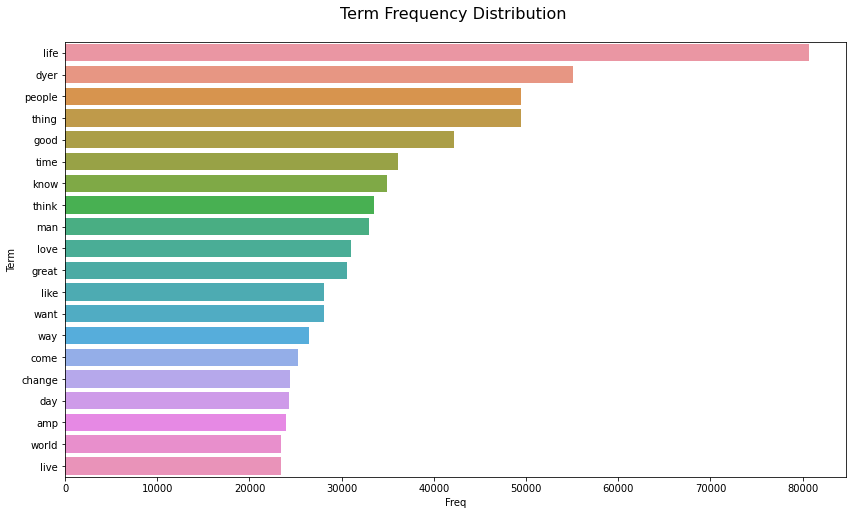

<IPython.core.display.Javascript object>

In [50]:
plt.figure(figsize=(14, 8))
sns.barplot(data=freq.head(20), x="Freq", y="Term")
plt.title("Term Frequency Distribution \n", fontsize=16)
plt.show()

In [51]:
# mask = np.array(
#     Image.open("/content/drive/MyDrive/Data/NLP_Capstone/word_cloud_background.png")
# )

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Data/NLP_Capstone/word_cloud_background.png'

<IPython.core.display.Javascript object>

In [ ]:
def wordcloud(text, colormap='tab10', background_color='white'):
  cloud = WordCloud(width=1600, height=800,
                    mask=None, 
                    stopwords=None, 
                    colormap=colormap, 
                    background_color=background_color).generate(text)

  plt.figure(figsize=(12,10))
  plt.imshow(cloud)
  plt.axis("off")
  plt.tight_layout(pad=0)
  plt.show()

In [ ]:
wordcloud(" ".join(freq['Term']))

# Topic Modeling

In [ ]:
# create dictionary
id2word = corpora.Dictionary(words)
# create texts corpus
texts = words
# term document frequency
corpus = [id2word.doc2bow(text) for text in texts]
# print corpus
print(corpus[:1][0][:30])

In [ ]:
# number of topics
num_topics = 10
# build LDA model
base_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# # print the keyword in the 10 topics
# pprint(base_model.print_topics())
# doc_lda = base_model[corpus]

In [ ]:
# filtering for words 
words = [re.findall(r'"([^"]*)"',t[1]) for t in base_model.print_topics()]

# create topic sorted by 10 most relevent words
topics = [' '.join(t[0:10]) for t in words]


# print most relevent words for each topic
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

In [ ]:
# Compute Perplexity
## a measure of how good the model is. lower the better
base_perplexity = base_model.log_perplexity(corpus)
print('\nPerplexity: ', base_perplexity) 

# Compute Coherence Score
coherence_model = CoherenceModel(model=base_model, texts=df['lemma_tokens'], 
                                   dictionary=id2word, coherence='c_v')
coherence_lda_model_base = coherence_model.get_coherence()
print('\nCoherence Score: ', coherence_lda_model_base)

In [ ]:
# topic distance visualization 
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(base_model, corpus, id2word)

In [ ]:
# tweet bot will have a drop down for topic and seperate one for twitter user account
